In [ ]:
!pip install requests
!pip install werkzeug
!pip install pillow
!pip install google-cloud-translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class nasa_api:
  # The init method or constructor
  def __init__(self, search_input, keywords = "", location = "", year_start = "1920", year_end = "2022" ):
    self.search_input = search_input
    self.keywords = keywords
    self.location = location
    self.year_start = year_start
    self.year_end = year_end

  # Deleting (Calling destructor)
  def __del__(self):
      print('Destructor called, nasa_api object is deleted.')

  # function to search for and store the images in the images array
  def process_images(self):
    # importing modules
    from requests.auth import HTTPBasicAuth
    import requests
    import urllib.parse
    from PIL import Image, ImageTk
    from urllib.request import urlopen

    url = 'https://images-api.nasa.gov/search'
    # api key that we recieved from NASA   
    api_key = "vKL2xEwSCCT45K0PpLp4bKfySVdWBKWed6ueM8HX"
    # building the url request
    headers = {'Accept': 'application/json'}
    auth = HTTPBasicAuth('api_key', api_key)

    post_data = {'q' : self.search_input,
                 'keywords' : self.keywords, 
                 'media_type' : 'image', 
                 'location' : self.location,
                 'year_start' : self.year_start,
                 'year_end' : self.year_end}

    # Form data must be provided already urlencoded.
    params = urllib.parse.urlencode(post_data)
    # get the response with all the images
    req = requests.get(url, headers=headers, auth=auth, params=params)
    # format the response
    data_json = req.json()
    # number of images
    num_images = len(data_json["collection"]["items"])
    # empty array to store the images in
    images = []  

    for i in range(num_images - 1):
        # renaming the images to have them numbered rather than ambiguous text
        image_filename = "image%s.jpg" % i
        # searching for, resizing and opening the image 
        number_img = Image.open(urlopen(data_json["collection"]["items"][i]["links"][0]['href'])).resize((400, 400), Image.ANTIALIAS)
        #number_img = ImageTk.PhotoImage(number_img)
        images.append(number_img)

    return images




In [ ]:
# For testing purposes
nasa_object = nasa_api(search_input = "mars", keywords = "planet, space")
images2 = nasa_object.process_images()

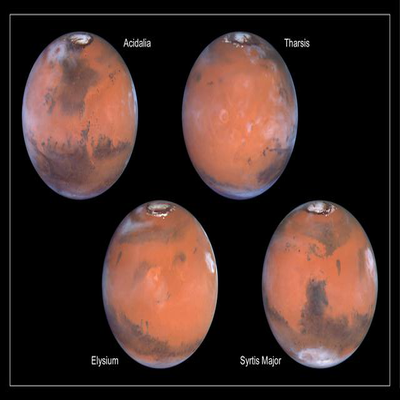

In [ ]:
images2[19]

In [ ]:
class translation_api:

    # The init method or constructor
  def __init__(self, target, user_input, format = None):
    self.target = target
    self.user_input = user_input
    self.format = format

  # Deleting (Calling destructor)
  def __del__(self):
      print('Destructor called, translation api object is deleted.')

  def translate_text(self):
        """Translates text into the target language.
        Target must be an ISO 639-1 language code.
        See https://g.co/cloud/translate/v2/translate-reference#supported_languages
        """
        import six
        from google.cloud import translate_v2 as translate
        import os
        os.environ['GOOGLE_APPLICATION_CREDENTIALS']="CSahlaniSA_Key.json"
        
        translate_client = translate.Client()

        if isinstance(self.user_input, six.binary_type):
            self.user_input = self.user_input.decode("utf-8")

        # Text can also be a sequence of strings, in which case this method
        # will return a sequence of results for each text.
        result = translate_client.translate(self.user_input, target_language=self.target, format_= self.format)
        translated_text = result["translatedText"] 
        return translated_text



In [ ]:
# for testing purposes
translate_object = translation_api(target = "fr", user_input = "hello")
result = translate_object.translate_text()
print(result)

bonjour
